In [1]:
import numpy as np
from numpy import *
import scipy.io
import struct

import csv
import numpy
import ipyvolume as ipv
from scipy import interpolate
#from scipy import special
#import matplotlib
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#from matplotlib import cm
#from matplotlib.ticker import LinearLocator, FormatStrFormatter


In [5]:
#set model parameters

def setmodelparams():
    pardict={}
    pardict["nx"]=10
    pardict["ny"]=10

    pardict["xmax"]=1.0
    pardict["xmin"]=-1.0
    pardict["ymax"]=1.0
    pardict["ymin"]=-1.0
    pardict["dt"]=0.1

    pardict["delx"]=(pardict["xmax"]-pardict["xmin"])/pardict["nx"]
    pardict["dely"]=(pardict["ymax"]-pardict["ymin"])/pardict["ny"]
    pardict["nc"]=1 #number of charges
    return pardict

In [6]:
#set model constants
ep0=8.854188e-12
c=3.0e8

In [9]:
#modelparams

pars=setmodelparams()
nx=pars["nx"]
ny=pars["ny"]

xmax=pars["nx"]
xmin=pars["nx"]
ymax=pars["nx"]
ymin=pars["nx"]

delx=pars["nx"]
dely=pars["nx"]

nc=pars["nc"]

delt=pars["dt"]   #0.1

In [24]:
#charge positions
xp=np.zeros(nc)
yp=np.zeros(nc)
vxp=np.zeros(nc)
vyp=np.zeros(nc)
vmag=np.zeros(nc)
omeg=np.zeros(nc)
q=np.zeros(nc)

#create fields
potential = np.zeros( (nx,ny) ); #scalar potential
ex = np.zeros( (nx,ny) ); # electric field x
ey = np.zeros(  (nx,ny)  ); #electric field y 

In [11]:
#set the charge positions
xp[0]=0.0
yp[0]=0.0

vmag[0]=0.2  #this is in units of c
vyp[0]=np.sin(np.pi/4)
vxp[0]=np.cos(np.pi/4)

omeg[0]=0.5
q[0]=1.0  #this is the charge divided by 4pi epsilon0



In [14]:
cdat={}
cdat["xp"]=xp
cdat["yp"]=yp
cdat["vmag"]=vmag
cdat["vxp"]=vxp
cdat["vyp"]=vyp
cdat["omeg"]=omeg
cdat["q"]=q

In [25]:
t=0.1 #current time
for i in range(0,nx-1):
    for j in range(0,ny-1):
        #intiailise potential and field because these are computed for each charge
        pot=0
        ext=0
        eyt=0
        for ic in range(0,nc):
            #compute field position
            x=xmin+delx*i
            y=ymin+dely*j
            #calculate change in charge position
            dx=delt*vxp[ic]*np.sin(omeg[ic]*t)
            dy=delt*vyp[ic]*np.sin(omeg[ic]*t)
            xp[ic]=x+dx
            yp[ic]=y+dx
            r12x=x-xp[ic]
            r12y=y-yp[ic]
            r12mag=np.sqrt(r12x*r12x+r12y*r12y)
            # compute component of velocity along field direction i.e. we use the vector dot product
            vrdash=vmag[ic]*(r12x*vxp[ic]+r12y*vyp[ic])/r12mag
            # compute potential
            pot=pot+((q/r12mag)*(1/(1-vrdash)))
        potential[i][j]=pot

#compute the fields
for i in range(0,nx-1):
    for j in range(0,ny-1):        
        #compute gradient (and field using central difference) if boundary assume 0 (charges always in middle of our large grid)
        #
        if i == 0:
            ex[i][j]=(potential[i+1][j])/delx
        elif i==nx-1:
            ex[i][j]=(-potential[i-1][j])/delx
        else:
            ex[i][j]=(potential[i+1][j]-potential[i-1][j])/delx
            
        if j == 0:
            ey[i][j]=(potential[i][j+1])/dely 
        elif j  == ny-1:   
            a=0#ey[i][j]=(-potential[i][j-1])/dely
        else:
            a=0#ey[i][j]=(potential[i][j+1]-potential[i][j-1])/dely
            

            
            

C:\Users\mikeg\AppData\Local\Temp\ipykernel_35340\2216390845.py:21: RuntimeWarning: invalid value encountered in scalar divide
  vrdash=vmag[ic]*(r12x*vxp[ic]+r12y*vyp[ic])/r12mag
C:\Users\mikeg\AppData\Local\Temp\ipykernel_35340\2216390845.py:23: RuntimeWarning: invalid value encountered in divide
  pot=pot+((q/r12mag)*(1/(1-vrdash)))
C:\Users\mikeg\AppData\Local\Temp\ipykernel_35340\2216390845.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  potential[i][j]=pot


In [23]:
print(ex)
print(ey)

0
0


In [ ]:
#function to update the electric field and the potential
def updatefields(t,pars,cdat,opotential,oex,oey):
    #extract modelpars from  modelpars
    nx=pars["nx"]
    ny=pars["ny"]
    
    xmax=pars["nx"]
    xmin=pars["nx"]
    ymax=pars["nx"]
    ymin=pars["nx"]
    
    delx=pars["nx"]
    dely=pars["nx"]
    
    delt=pars["dt"]   #0.1

    #extract chargedat from chargedat
    xp=cdat["xp"]
    yp=cdat["yp"]
    vmag=cdat["vmag"]
    vxp=cdat["vxp"]
    vyp=cdat["vyp"]
    omeg=cdat["omeg"]
    q=cdat["q"]

    
    for i in range(0,nx-1):
        for j in range(0,ny-1):
            #intiailise potential and field because these are computed for each charge
            pot=0
            ex=0
            ey=0
            for ic in range(0,nc):
                #compute field position
                x=xmin+delx*i
                y=ymin+dely*j
                #calculate change in charge position
                dx=delt*vxp[ic]*np.sin(omeg[ic]*t)
                dy=delt*vyp[ic]*np.sin(omeg[ic]*t)
                xp[ic]=x[ic]+dx
                yp[ic]=y[ic]+dx
                r12x=x-xp[ic]
                r12y=y-yp[ic]
                r12mag=np.sqrt(r12x*r12x+r12y*r12y)
                # compute component of velocity along field direction i.e. we use the vector dot product
                vrdash=vmag[ic]*(r12x*vxp[ic]+r12y*vyp[ic])/r12mag
                # compute potential
                pot=pot+((q/r12mag)*(1/(1-vrdash)))
            potential[i][j]=pot
    
    #compute the fields
    for i in range(0,nx-1):
        for j in range(0,ny-1):        
            #compute gradient (and field using central difference) if boundary assume 0 (charges always in middle of our large grid)
            #
            if i == 0:
                ex[i][j]=(potential[i+1][j])/delx
            elif i==nx-1:
                ex[i][j]=(-potential[i-1][j])/delx
            else:
                ex[i][j]=(potential[i+1][j]-potential[i-1][j])/delx
                
             if j == 0:
                ey[i][j]=(potential[i][j+1])/dely 
             elif j  == nx2-1:   
                ey[i][j]=(-potential[i][j-1])/dely
             else:
                ey[i][j]=(potential[i][j+1]-potential[i][j-1])/dely


    return potential,ex,ey

In [ ]:
t=0.1
pars=setmodelparams()

cdat["xp"]=xp
cdat["yp"]=yp
cdat["vmag"]=vmag
cdat["vxp"]=vxp
cdat["vyp"]=vyp
cdat["omeg"]=omeg
cdat["q"]=q

potential,ex,ey=updatefields(t,pars,cdat,potential,ex,ey)

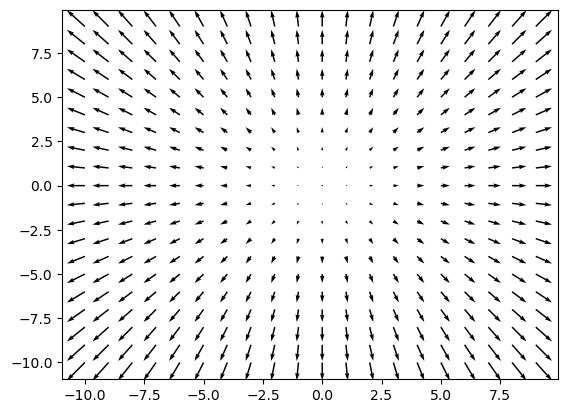

In [1]:
#use matplotlib quiver plot
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')

plt.show()

In [2]:
import numpy as np
import ipyvolume as ipv

# Spatial grid
u = np.linspace(-1, 1, 32)
x, y = np.meshgrid(u, u)
x = x.flatten()
y = y.flatten()


In [3]:
# Time evolution
timesteps = 20
r = np.sqrt(x**2 + y**2)

ex_sequence = np.array([np.cos(r + t) for t in np.linspace(0, 2*np.pi, timesteps)])
ey_sequence = np.array([np.sin(r + t) for t in np.linspace(0, 2*np.pi, timesteps)])

In [6]:
def exeyupdate(t, x, y):
    r = np.sqrt(x**2 + y**2)
    ex = np.cos(r + t)
    ey = np.sin(r + t)
    return ex, ey


In [7]:
timesteps = 20
xgrid, ygrid = np.meshgrid(np.linspace(-1, 1, 32), np.linspace(-1, 1, 32))
x = xgrid.flatten()
y = ygrid.flatten()

ex_sequence = []
ey_sequence = []

for t in np.linspace(0, 2*np.pi, timesteps):
    ex, ey = exeyupdate(t, x, y)
    ex_sequence.append(ex)
    ey_sequence.append(ey)

ex_sequence = np.array(ex_sequence)
ey_sequence = np.array(ey_sequence)


In [8]:
ipv.figure()
q = ipv.quiver(x, y, np.zeros_like(x),  # positions
               ex_sequence, ey_sequence, np.zeros_like(ex_sequence),  # vectors
               size=5, color='blue')

ipv.animation_control(q, interval=200)
ipv.show()

Container(children=[HBox(children=(Play(value=0, interval=200, max=19), IntSlider(value=0, max=19)))], figure=…